# Libraries

In [1]:
import time
import pandas as pd
import numpy as np
import re

import json
import os

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objs as go

# remove verison errors
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn Palette colors
**Choices**: ch:start=.2,rot=-.3 / Purples_d / Blues / Reds / "RdBu"

**Options**: reversed (_r) and dark (_d).

In [2]:
colors = ["#4374B3", "#FF8C37"]
cmap = sns.color_palette(colors)
cmap


[(0.2627450980392157, 0.4549019607843137, 0.7019607843137254),
 (1.0, 0.5490196078431373, 0.21568627450980393)]

In [3]:
sns.set(style="dark")
sns.set_palette(cmap)
# sns.set_palette()  # Reset to default palette


# Import CSV

## Raw data

In [4]:
path = 'repository/data_prep/Original_Appendicitis.csv'
knn_path = 'repository/data_prep/KNN_Appendicitis.csv'
iter_path = 'repository/data_prep/IterativeImputer_Appendicitis.csv'
# ---
df = pd.read_csv(path)
knn_df_imputed = pd.read_csv(knn_path)
interative_df_imputed = pd.read_csv(iter_path)

In [5]:
df_dict = {'Original': df,'KNN': knn_df_imputed,'IterativeImputer':interative_df_imputed}

In [6]:
df

age  sex  height  body_weight     bmi  body_temperature  alcohol  \
0     12    0     NaN         39.0     NaN              36.6        1   
1     37    1     NaN         59.0     NaN              36.5        1   
2     28    1     NaN          NaN     NaN              37.1        1   
3     36    1   161.0         43.0  16.589               NaN        1   
4     19    1   165.0         46.0  16.896              37.1        1   
..   ...  ...     ...          ...     ...               ...      ...   
495   25    1   177.0          NaN  36.707              39.7        0   
496   30    0   155.0         55.0  22.893              37.0        1   
497   26    0   155.0         64.4  26.805              37.3        1   
498   19    1     NaN         74.0  20.499              36.8        0   
499   39    0   160.0         74.0  28.906              37.0        0   

     exercise  smoking    WBC  ...  Migration of pain  \
0           1        1    NaN  ...                2.0   
1           1        1    NaN  ...                NaN   
2           1        1    NaN  ...                NaN   
3           1        1    NaN  ...                NaN   
4           1        1    NaN  ...                NaN   
..        ...      ...    ...  ...                ...   
495         1        0  16.83  ...                1.0   
496         1        1    NaN  ...                NaN   
497         1        0    NaN  ...                NaN   
498         1        0    NaN  ...                NaN   
499         1        1   8.00  ...                1.0   

     Tenderness in right lower quadrant  Rebound tenderness  Cough tenderness  \
0                                   1.0                 1.0                 2   
1                                   1.0                 1.0                 2   
2                                   2.0                 NaN                 1   
3                                   1.0                 1.0                 2   
4                                   2.0                 2.0                 2   
..                                  ...                 ...               ...   
495                                 1.0                 NaN                 2   
496                                 1.0                 1.0                 2   
497                                 1.0                 2.0                 1   
498                                 1.0                 1.0                 2   
499                                 1.0                 1.0                 2   

     Nausea/vomiting  Anorexia  Dysuria  Stool  Alvarado Score (AS)  \
0                  2       2.0      1.0    NaN                    3   
1                  2       2.0      2.0    2.0                    2   
2                  2       2.0      1.0    2.0                    4   
3                  2       2.0      NaN    2.0                    2   
4                  2       NaN      2.0    2.0                    5   
..               ...       ...      ...    ...                  ...   
495                2       NaN      1.0    2.0                    6   
496                2       2.0      NaN    NaN                    2   
497                2       2.0      NaN    1.0                    4   
498                2       2.0      1.0    1.0                    2   
499                2       2.0      1.0    3.0                    2   

     Pediatric appendicitis score (PAS)  
0                                     5  
1                                     4  
2                                     4  
3                                     4  
4                                     6  
..                                  ...  
495                                   7  
496                                   4  
497                                   4  
498                                   4  
499                                   4  

[500 rows x 34 columns]

In [7]:
missing_df = pd.DataFrame({'Missing Values': df.isna().sum().sort_values(ascending=False), 'Percentage Missing Values': (
    df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
missing_df

Missing Values  Percentage Missing Values
Urine Sugar                                    463                       92.6
Urine Specific gravity                         462                       92.4
Urine Color                                    418                       83.6
Urine Ketone                                   396                       79.2
Leukocytes                                     386                       77.2
Neutrophil                                     343                       68.6
Lymphocytes                                    342                       68.4
Urine RBC                                      332                       66.4
Urine WBC                                      330                       66.0
WBC                                            297                       59.4
RBC                                            284                       56.8
Urine Leukocytes                               275                       55.0
Migration of pain                              263                       52.6
height                                         168                       33.6
bmi                                            162                       32.4
Stool                                          158                       31.6
body_weight                                    115                       23.0
Anorexia                                       109                       21.8
Peritonitis/abdominal guarding                  91                       18.2
Rebound tenderness                              87                       17.4
Dysuria                                         82                       16.4
body_temperature                                45                        9.0
Tenderness in right lower quadrant               2                        0.4
Alvarado Score (AS)                              0                        0.0
Nausea/vomiting                                  0                        0.0
Cough tenderness                                 0                        0.0
age                                              0                        0.0
Conditions                                       0                        0.0
Target                                           0                        0.0
sex                                              0                        0.0
smoking                                          0                        0.0
exercise                                         0                        0.0
alcohol                                          0                        0.0
Pediatric appendicitis score (PAS)               0                        0.0

# Feature Portability
**Obj**: Grouped some feature easy to EDA

In [8]:
df["age"].describe()

count    500.000000
mean      22.902000
std        9.955834
min        0.000000
25%       16.000000
50%       23.000000
75%       31.000000
max       40.000000
Name: age, dtype: float64

In [9]:
df["AgeGroup"] = pd.cut(df["age"], bins=[0, 10, 20, 30,
                               40], labels=["< 10", "11 - 20", "21 - 30", "31 - 40"])
df['AgeGroup']

0      11 - 20
1      31 - 40
2      21 - 30
3      31 - 40
4      11 - 20
        ...   
495    21 - 30
496    21 - 30
497    21 - 30
498    11 - 20
499    31 - 40
Name: AgeGroup, Length: 500, dtype: category
Categories (4, object): ['< 10' < '11 - 20' < '21 - 30' < '31 - 40']

In [10]:
age_group = {'< 10': 0, '11 - 20': 1, '21 - 30': 2, '31 - 40': 3}
df['AgeGroup'] = df['AgeGroup'].map(age_group)
df['AgeGroup']

0      1
1      3
2      2
3      3
4      1
      ..
495    2
496    2
497    2
498    1
499    3
Name: AgeGroup, Length: 500, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

# Exploratory Data Analysis
Obj: 
- identifying and dealing with missing values, outliers, and inconsistencies in the dataset.
- identifying Patterns and Relationships, such as The higher WBC can distinguish between disease and no disease
- identifying the most informative variables for modeling

## 1. Pairgrid
**Obj** : 
- **Relationships**: the relationship between each pair of variables.
- **Correlations**: Linearity each pair of variables.
- **Outliers** and etc.

### Original
Original df contains crucial missing values, so select subset of features that Percentage Missing Value== 0% of dataset

In [11]:
missing_df.loc[missing_df['Percentage Missing Values']==0].index

Index(['Alvarado Score (AS)', 'Nausea/vomiting', 'Cough tenderness', 'age',
       'Conditions', 'Target', 'sex', 'smoking', 'exercise', 'alcohol',
       'Pediatric appendicitis score (PAS)'],
      dtype='object')

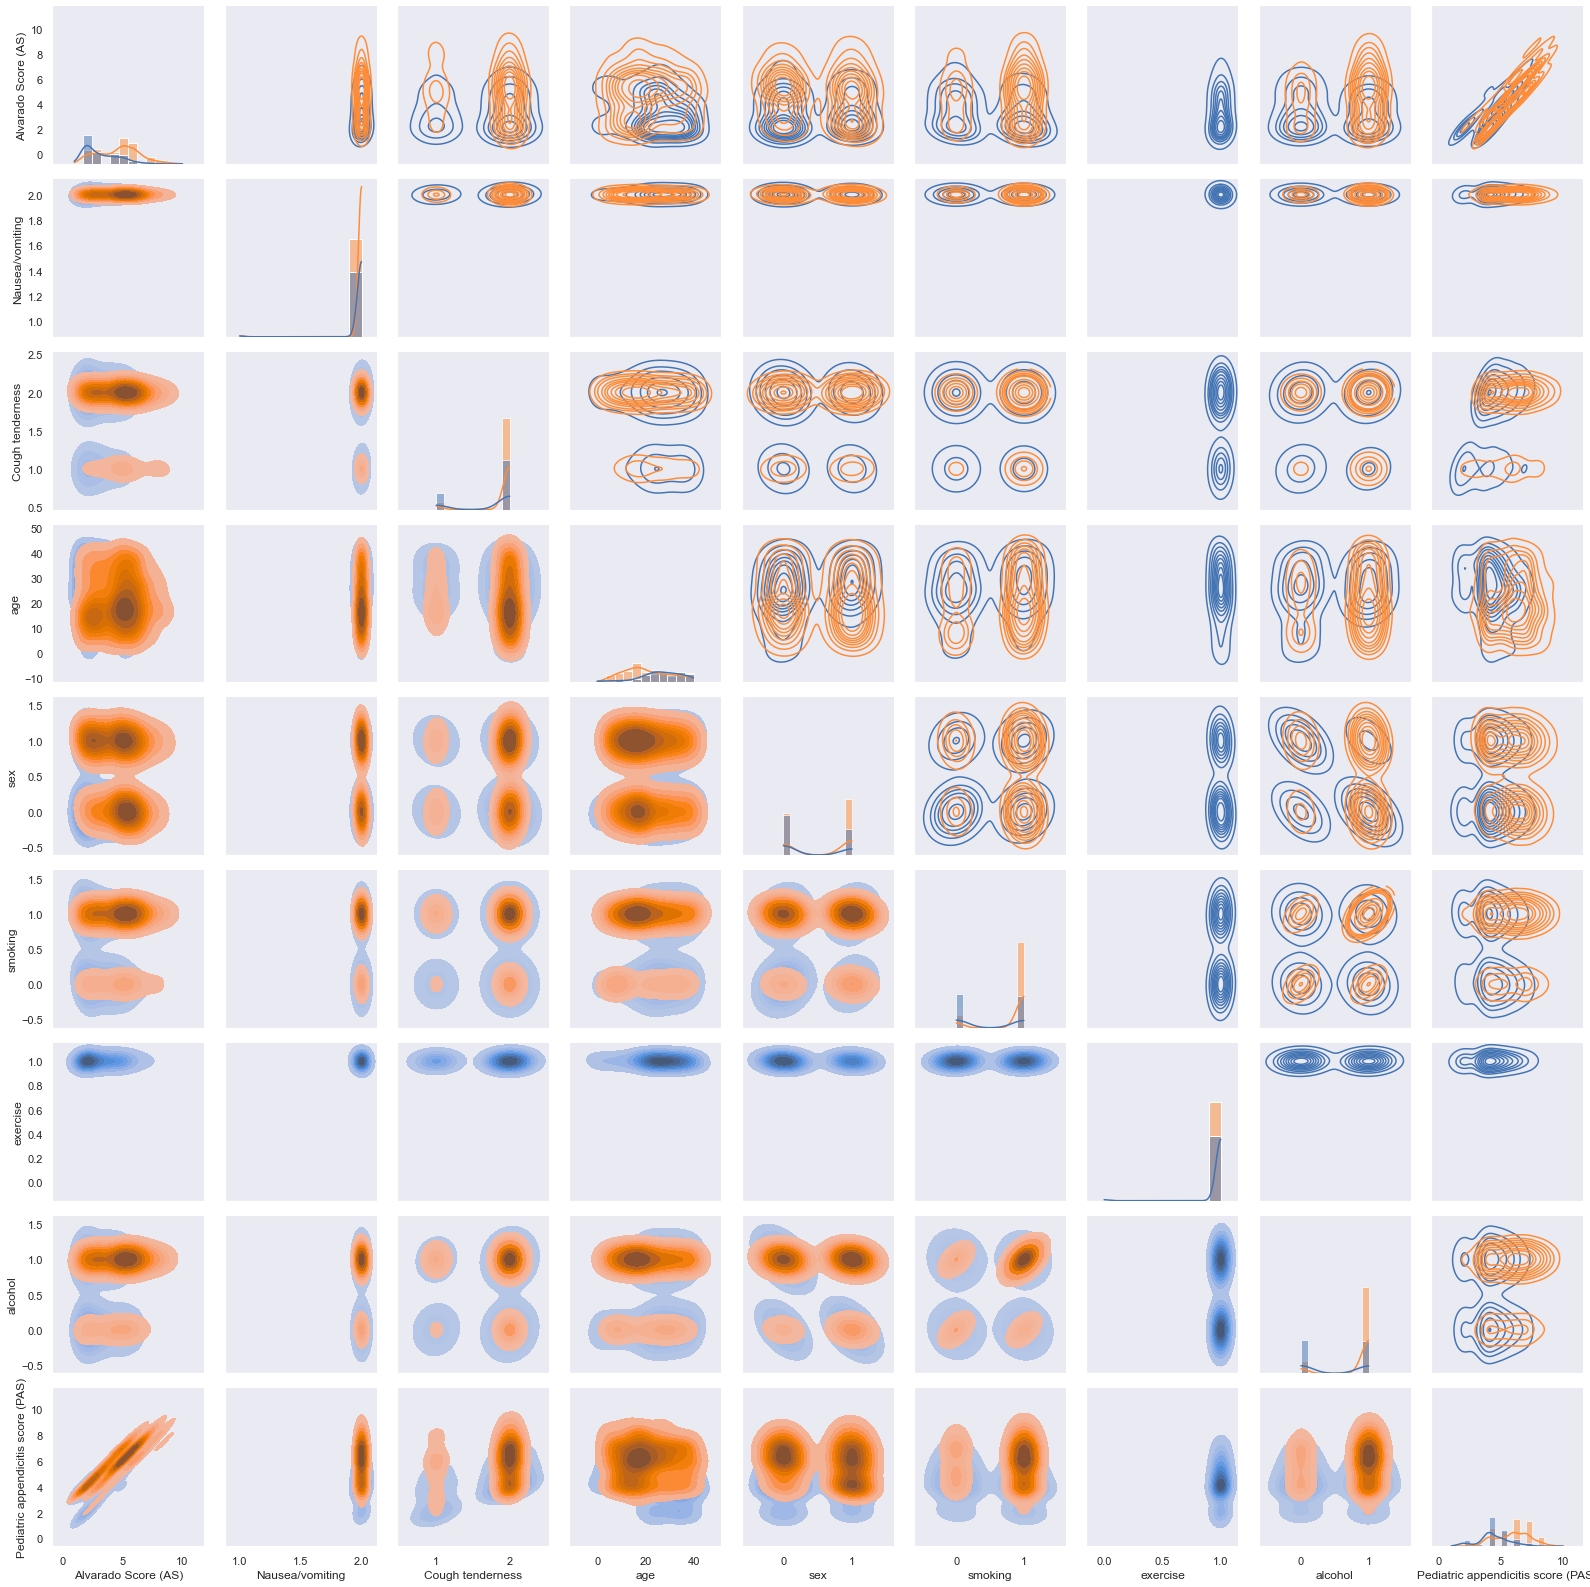

In [12]:
g = sns.PairGrid(df[['Alvarado Score (AS)', 'Nausea/vomiting', 'Cough tenderness', 'age',
                     'Conditions', 'Target', 'sex', 'smoking', 'exercise', 'alcohol',
                     'Pediatric appendicitis score (PAS)']].dropna(), hue='Target')
g.map_upper(sns.kdeplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)


### KNNImputer

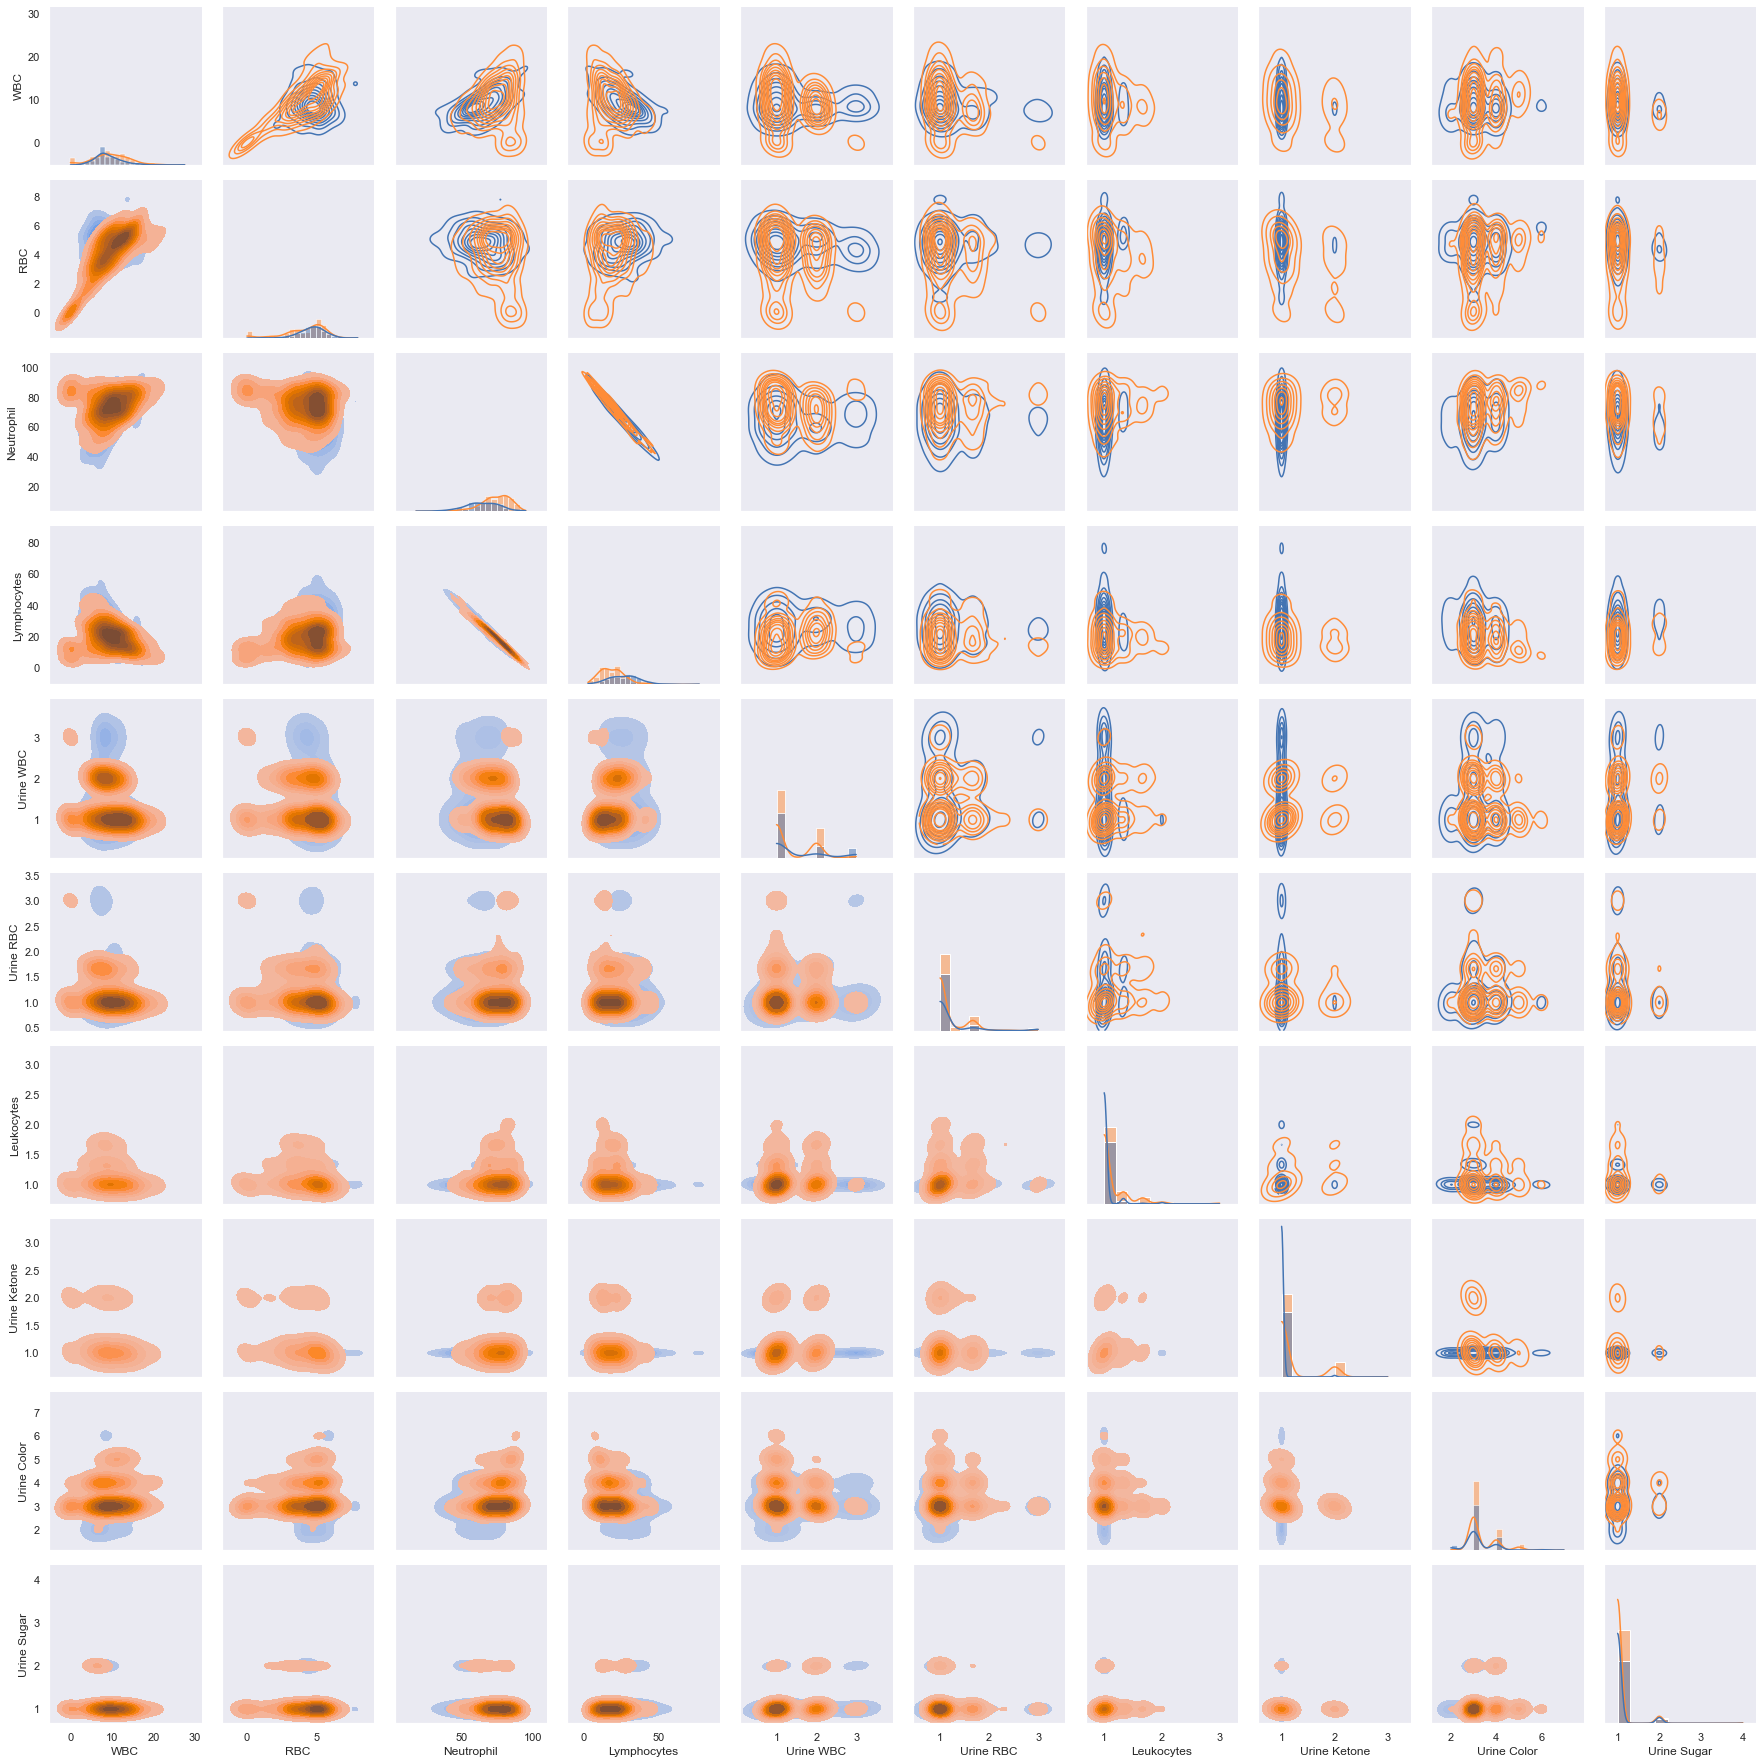

In [13]:
g = sns.PairGrid(knn_df_imputed[['WBC', 'RBC', 'Neutrophil',
                                 'Lymphocytes', 'Urine WBC', 'Urine RBC', 'Leukocytes', 'Urine Ketone',
                                 'Urine Color', 'Urine Sugar',
                                'Target']], hue='Target')
g.map_upper(sns.kdeplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)


### IterativeImputer

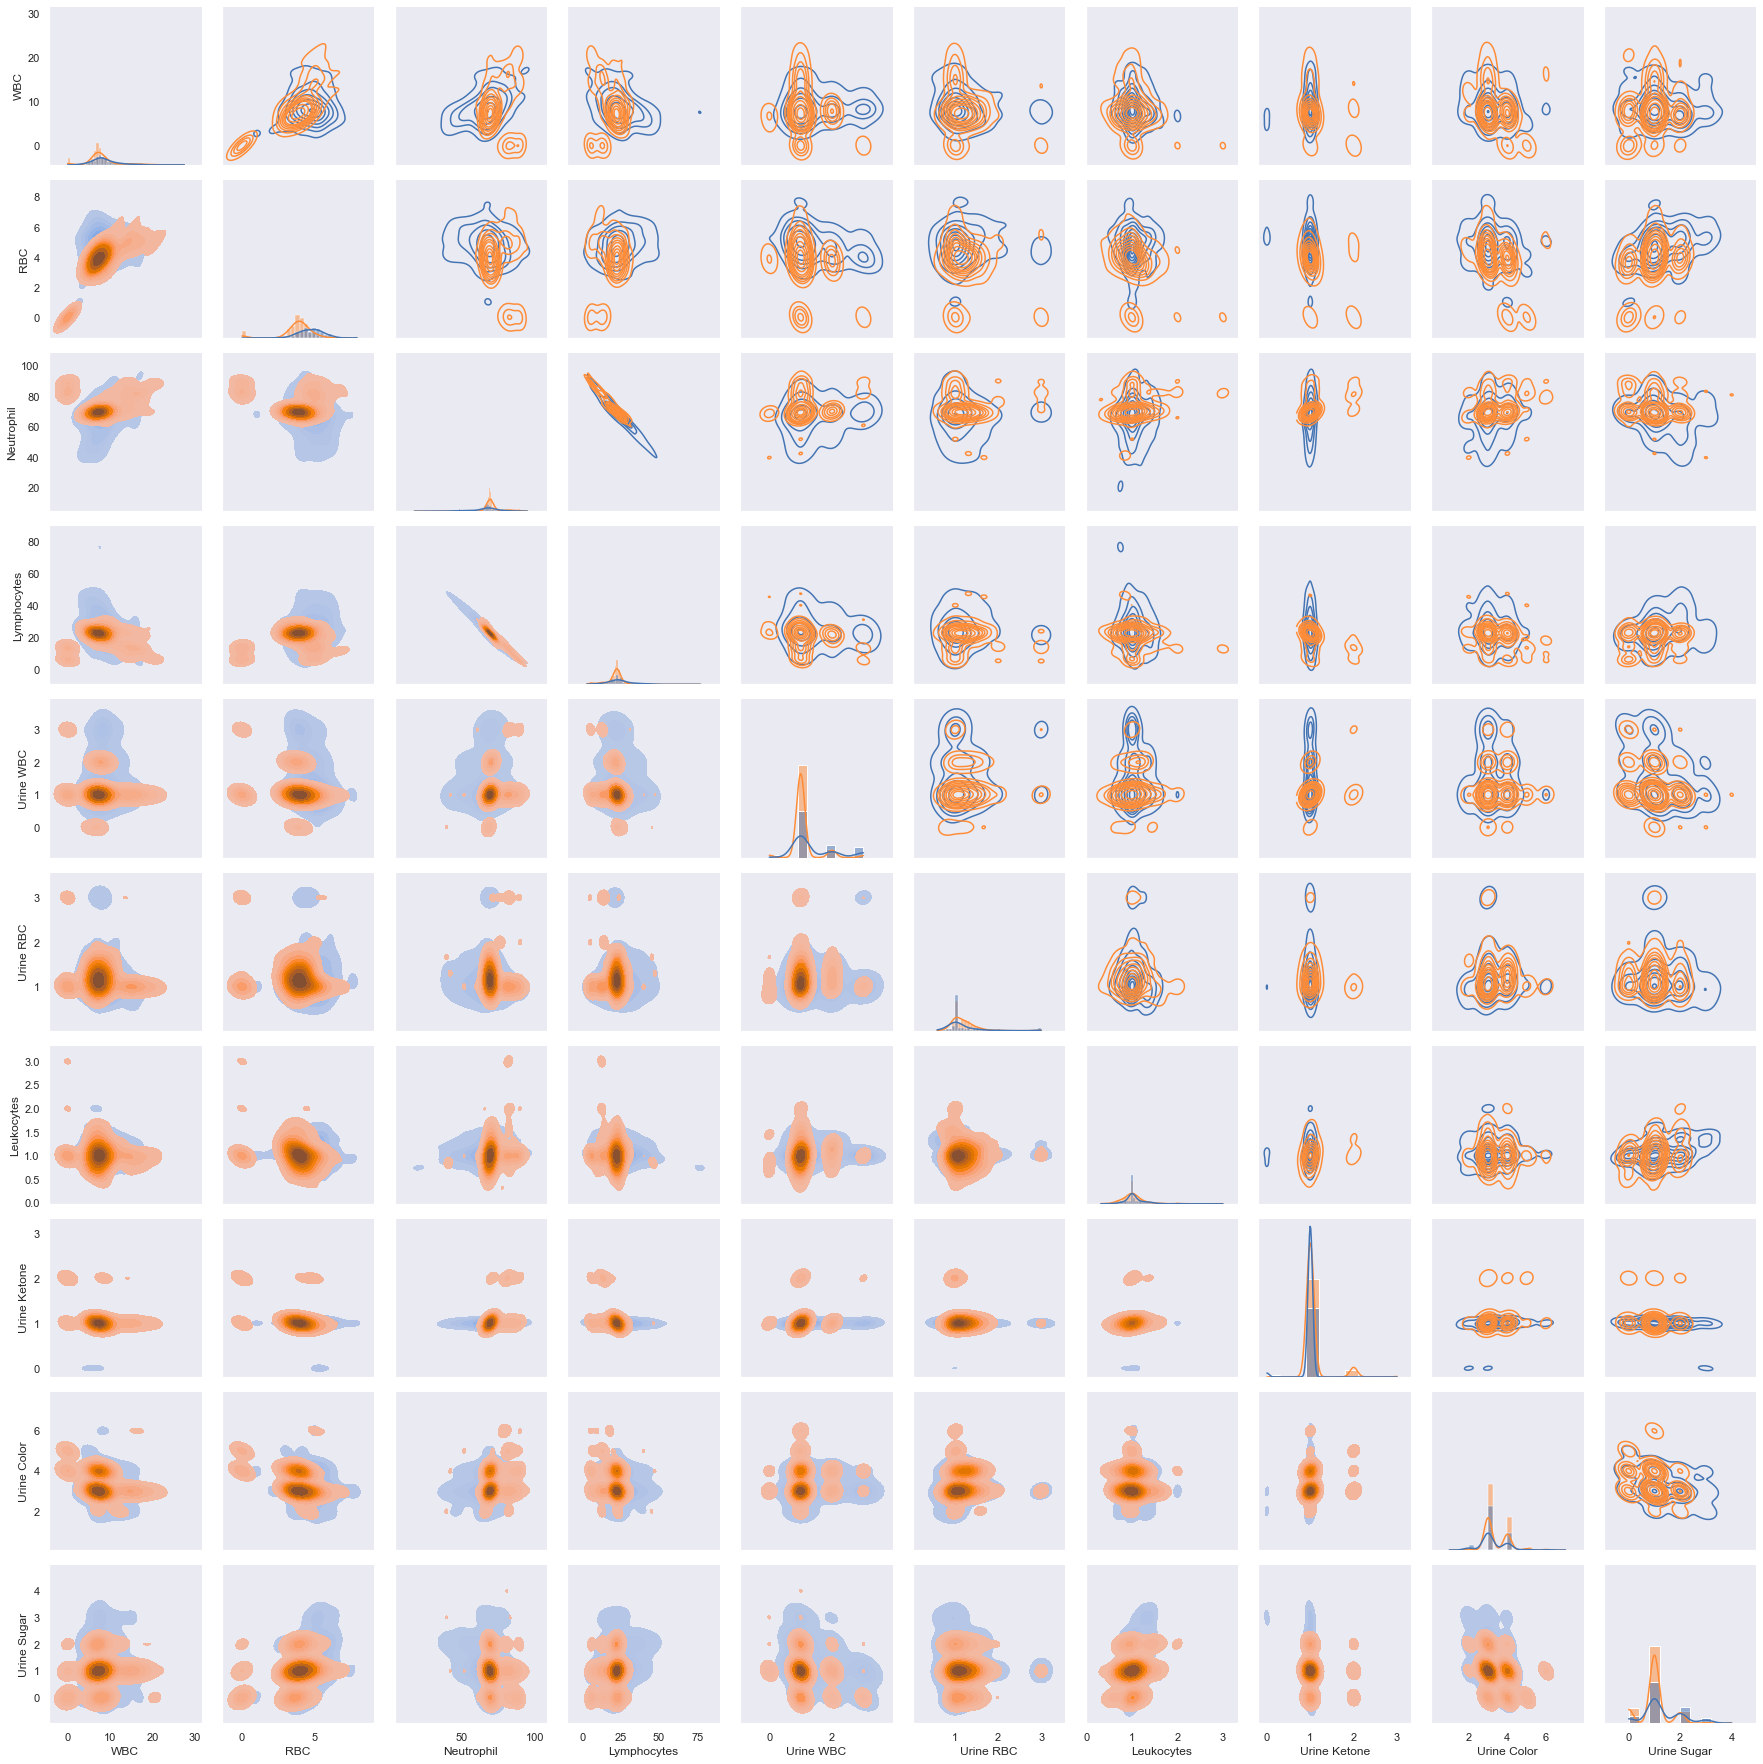

In [14]:
g = sns.PairGrid(interative_df_imputed[['WBC', 'RBC', 'Neutrophil',
                                 'Lymphocytes', 'Urine WBC', 'Urine RBC', 'Leukocytes', 'Urine Ketone',
                                 'Urine Color', 'Urine Sugar',
                                'Target']], hue='Target')
g.map_upper(sns.kdeplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

## 2. Age
Appendicitis is among the commonest **childhood** diseases, between 10 and 19 years of age.

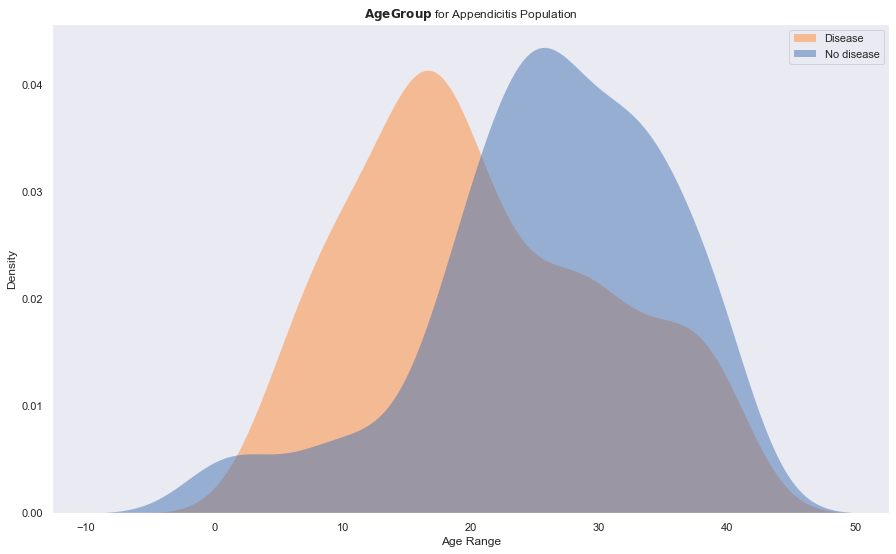

In [15]:
plt.figure(figsize=(15, 9))
ax = sns.kdeplot(
    data=df, x='age', hue="Target",
    fill=True, common_norm=False,
    alpha=.5, linewidth=0,
)

ax.set_title(r'$\bf{' + 'AgeGroup' + '}$' +
             ' for Appendicitis Population')
ax.legend(['Disease', 'No disease'])
ax.set(xlabel='Age Range')

plt.show()


Text(0, 0.5, 'Age')

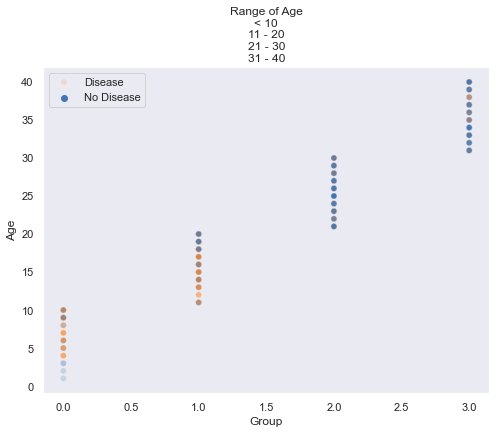

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="AgeGroup", y="age", hue="Target", alpha=0.2)
plt.legend(title="Target", loc="upper right")
plt.title('Range of Age\n'+'\n'.join(age_group.keys()))
plt.legend(['Disease', 'No Disease'])
plt.xlabel("Group")
plt.ylabel("Age")


 between 4 and 18 years of age. is a range of disease group

## 3. Relation of WBC Differential
| Variable | Full form | TH | Normal range | Indicates the condition / บ่งบอกสภาวะ | Differential |
| --- | --- | --- | --- | --- | --- |
| WBC | White blood cell | ค่าปริมาณเซลล์เม็ดเลือดขาว  | 4,500 – 11,000 cells/mm³ | High WBC Count (Leukocytosis)/ Low WBC Count (Leukopenia) / การติดเชื้อแบคทีเรียม (Bacteria) / การต่อต้านเชื้อไวรัส (Virus) / ภาวะอักเสบเรื้อรัง (Chronic Inflammation) / ภาวะภูมิแพ้ (Allergy) | Neutrophil 50%-70% / Lymphocyte 20%-40% / Monocyte 0%-7% / Eosinophil 0%-5% / Basophil 0%-1% |

| WBC | Neutrophil | Lymphocytes | Leukocytes |
| --- | --- | --- | --- |

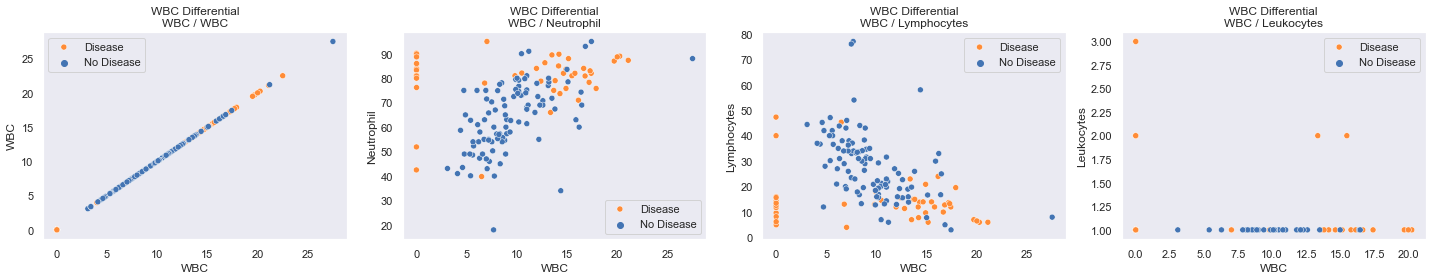

In [17]:
features = ['WBC', 'Neutrophil', 'Lymphocytes', 'Leukocytes']
n_rows = 1
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))

for i, col in enumerate(features):
    sns.scatterplot(data=df, x='WBC', y=col, hue='Target',
                     ax=axes[i])

    axes[i].set_xlabel('WBC')
    axes[i].set_ylabel(col)
    axes[i].legend(['Disease', 'No Disease'])
    axes[i].set_title(f'WBC Differential\nWBC / {col}')

plt.tight_layout()
plt.show()


## 4. Alvarado Score (AS) and Pediatric appendicitis score (PAS) on Disease / No Disease

In [18]:
related_cols = ['Migration of pain','Anorexia','Urine Ketone','Nausea/vomiting','Tenderness in right lower quadrant','Rebound tenderness','WBC','Neutrophil']

### 4.1 Relation between(AS, PAS) and (Related variables)


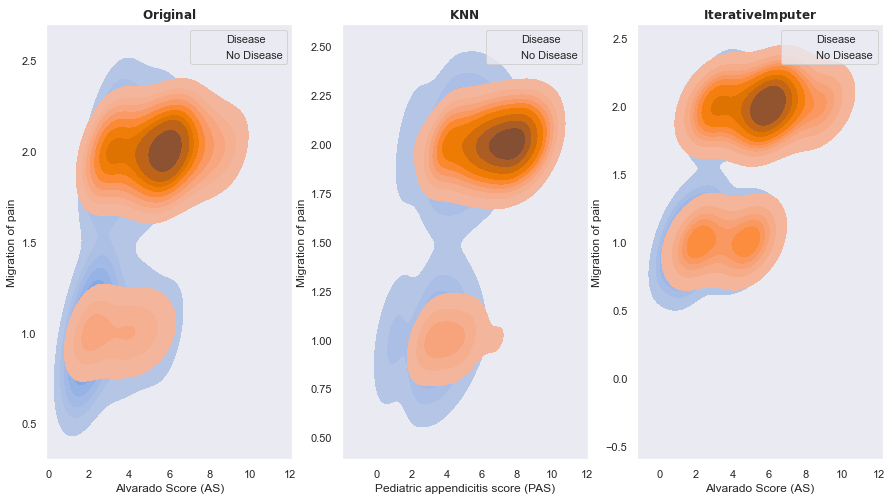

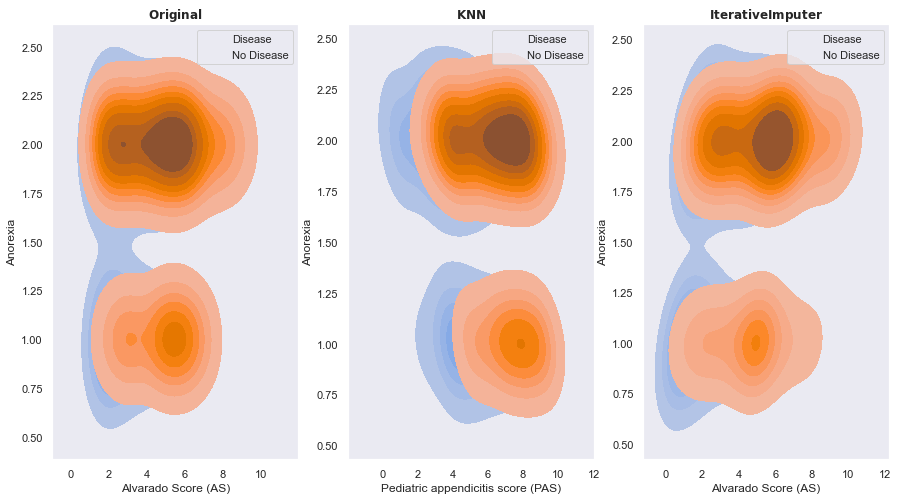

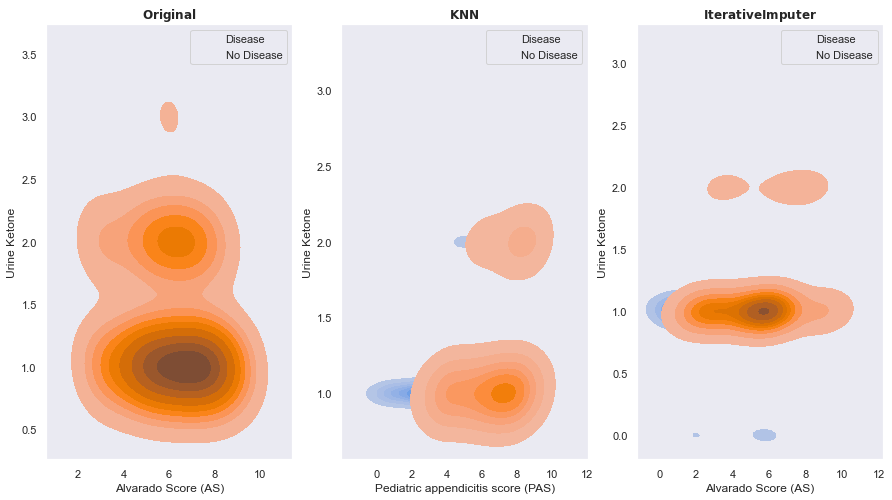

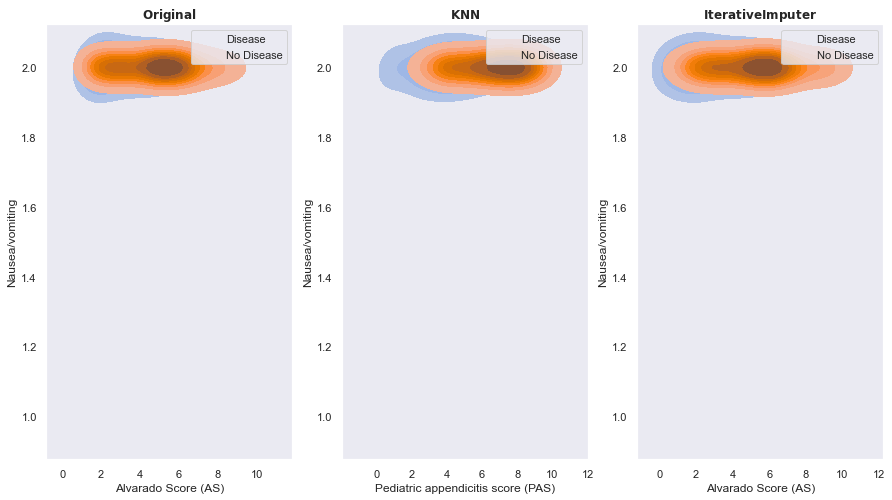

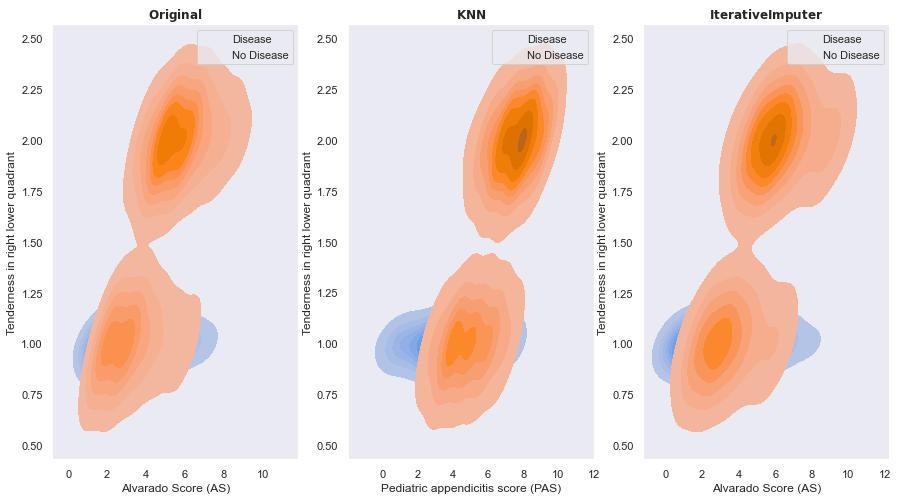

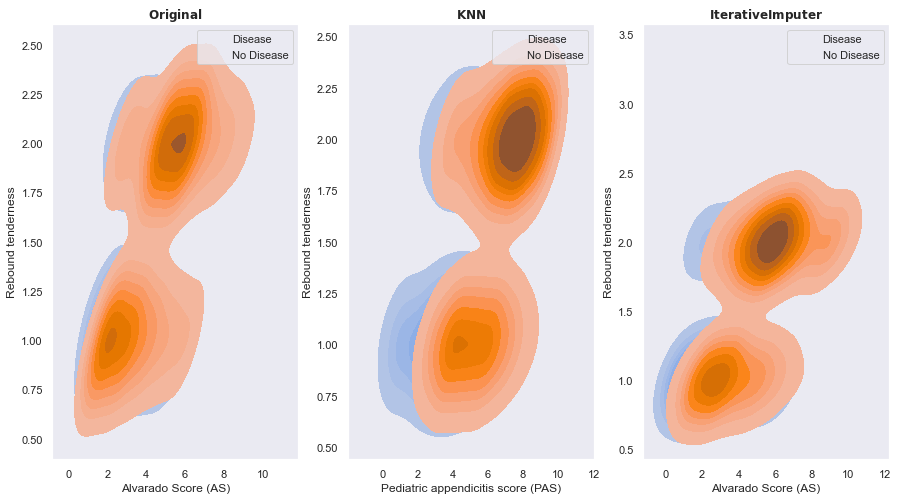

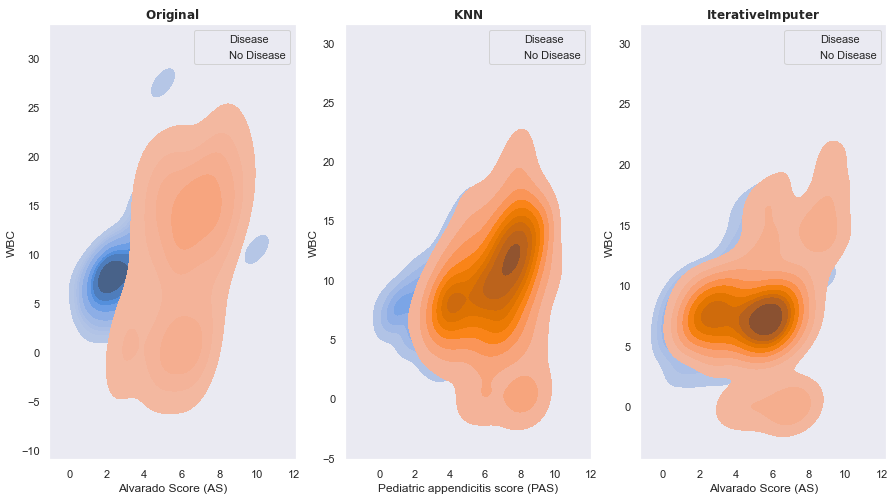

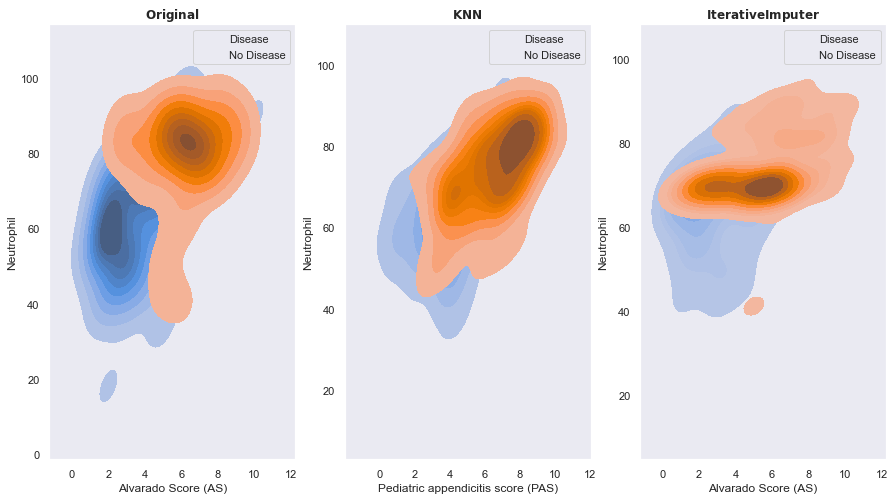

In [19]:
for col in related_cols:
    fig, axes = plt.subplots(1, 3, figsize=(15, 8))
    # Orignal
    axes[0].set_title(r'$\bf{' + list(df_dict.keys())[0] + '}$')
    sns.kdeplot(ax=axes[0], data=list(df_dict.values())[0], x='Alvarado Score (AS)',
                y=col, fill=True, hue="Target")
    axes[0].legend(['Disease', 'No Disease'])
    # Mean
    axes[1].set_title(r'$\bf{' + list(df_dict.keys())[1] + '}$')
    sns.kdeplot(ax=axes[1], data=list(df_dict.values())[1], x='Pediatric appendicitis score (PAS)',
                y=col, fill=True, hue="Target")
    axes[1].legend(['Disease', 'No Disease'])
    # KNN
    axes[2].set_title(r'$\bf{' + list(df_dict.keys())[2] + '}$')
    sns.kdeplot(ax=axes[2], data=list(df_dict.values())[2], x='Alvarado Score (AS)',
                y=col, fill=True, hue="Target")
    axes[2].legend(['Disease', 'No Disease'])
    plt.show()


### 4.2 AS vs PAS

[Text(0.5, 1.0, '$\\bf{Original}$')]

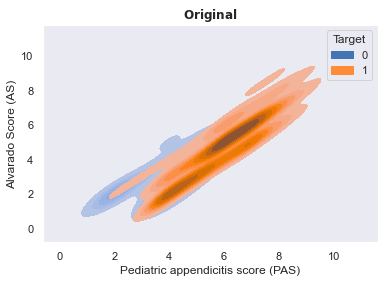

In [20]:
sns.kdeplot(data=df, x='Pediatric appendicitis score (PAS)', y='Alvarado Score (AS)',
            fill=True, hue='Target').set(title=r'$\bf{' + 'Original' + '}$')

# 5. Correlation

## 5.1 Pearson Correlation 
Full features 

<AxesSubplot: title={'center': 'Pearson Correlation Matrix'}>

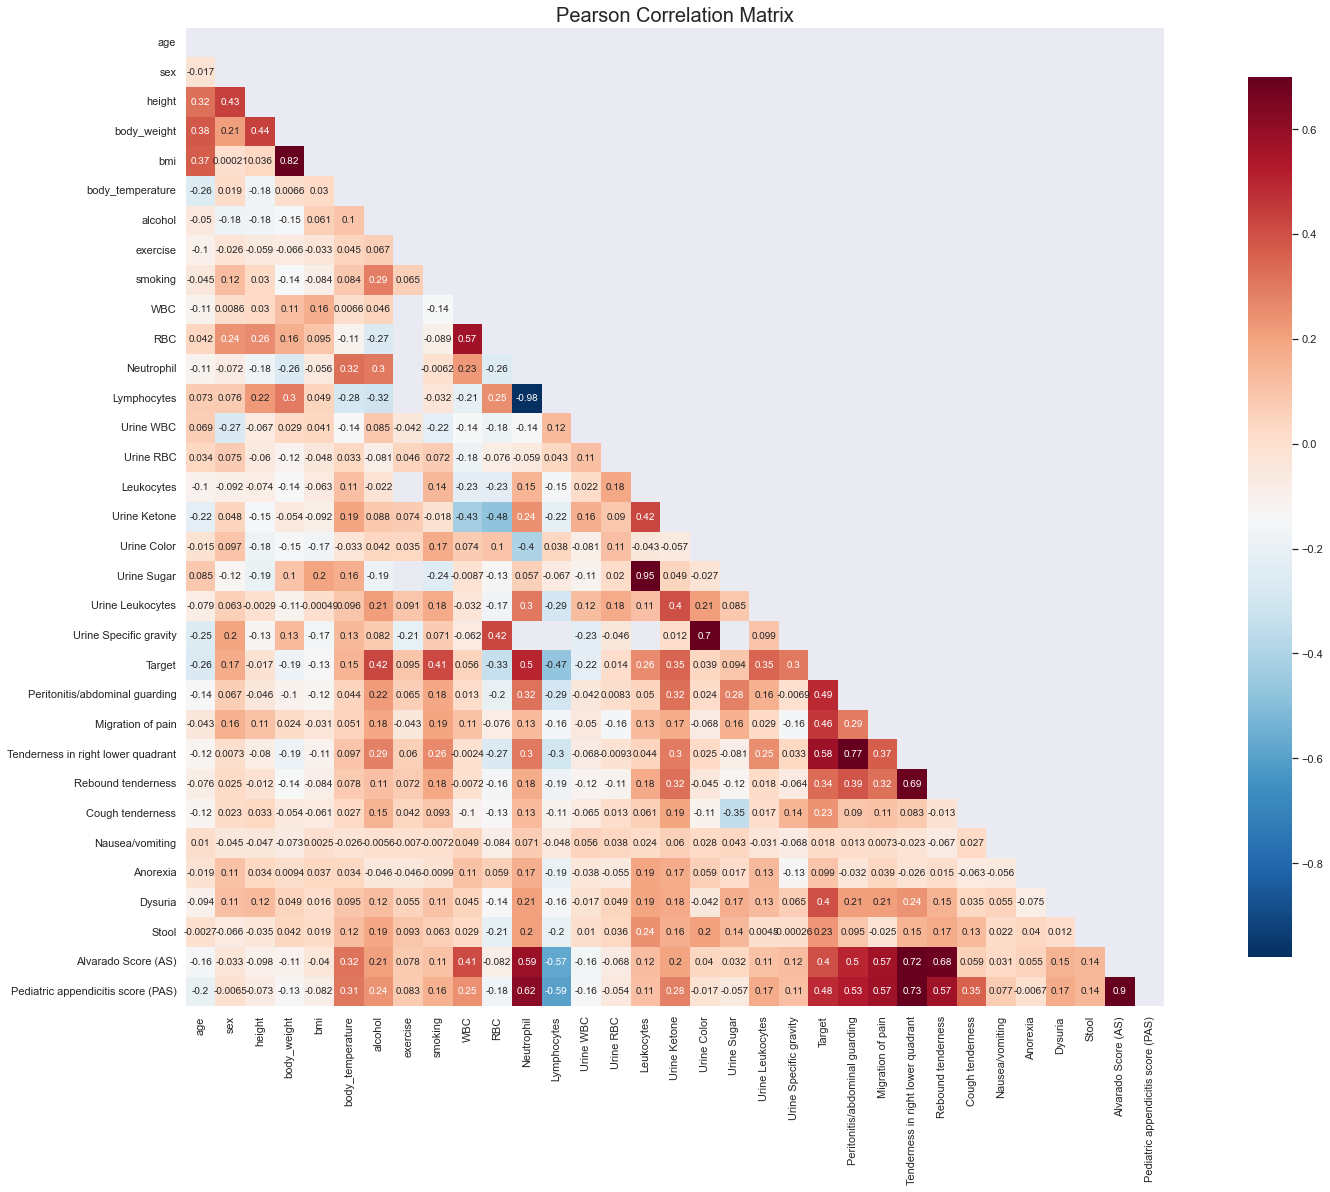

In [37]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

fig, axes = plt.subplots(figsize=(30, 18))
plt.title('Pearson Correlation Matrix',fontsize=20)
# Purples_r
sns.heatmap(df.corr(), linewidths=0, vmax=0.7, square=True, cmap='RdBu_r',
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": .9})

## 5.2 Pearson Correlation
on Target 

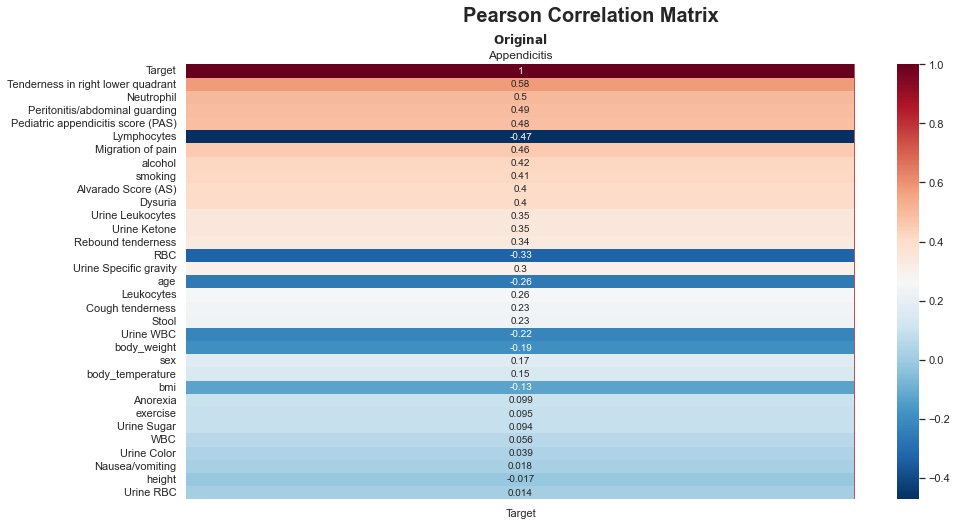

In [32]:
fig, axes = plt.subplots(figsize=(15, 8))
fig.suptitle('Pearson Correlation Matrix', fontsize=20, fontweight='bold')

corr_matrix = df.corr()
# Df section
target_corr = corr_matrix['Target']
other_corr = corr_matrix.drop('Target')['Target']
corr_df = pd.DataFrame({'Target': target_corr})
corr_df = corr_df.reindex(
    corr_df['Target'].abs().sort_values(ascending=False).index)
# Graph Section

axes.set_title(r'$\bf{' + 'Original' + '}$' +
               f'\nAppendicitis')
sns.heatmap(corr_df, annot=True, ax=axes, cmap='RdBu_r')
plt.vlines(x=1, ymin=0, ymax=len(corr_df), colors='r', linewidth=2)
plt.show()


## 6. Parallel Plots
**Obj**:  to visualize and compare relationship between features and classes, identify discriminative features.

#### Create a subset of related variables on **Target**

In [23]:
as_cols = ['Migration of pain',
            'Anorexia',
            'Urine Ketone',
            'Nausea/vomiting',
            'Tenderness in right lower quadrant',
            'Rebound tenderness',
            'WBC',
            'Neutrophil', 
            # Target
            'Target']


In [24]:
clinical_cols = ['Peritonitis/abdominal guarding',
                 'Migration of pain', 'Tenderness in right lower quadrant',
                 'Rebound tenderness', 'Cough tenderness', 'Nausea/vomiting', 'Anorexia',
                 'Dysuria', 'Stool'
                 # Target
                 'Target'
                 ]

In [25]:
lab_cols = ['WBC', 'RBC', 'Neutrophil',
'Lymphocytes', 'Urine WBC', 'Urine RBC', 'Leukocytes', 'Urine Ketone',
'Urine Color', 'Urine Sugar', 'Urine Leukocytes',
'Urine Specific gravity', 'Target']


In [26]:
# # Select colors for parallel_coordinates
# fig = px.colors.sequential.swatches_continuous()
# fig.show()

### 0 = No disease, 1 = Disease

In [27]:
fig = px.parallel_coordinates(df, color='Target', dimensions=lab_cols,
                              color_continuous_scale=colors,
                              title="Appendicitis Coordinates Plot")
fig.show()